In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [10]:
"""
Remember: to do polynomial regression (e.g. y ~ Ax^2 + Bx + C), we just transform the data and apply linear regression.
So for example sample (x_1, x_2) becomes (x_1, x_2, x_1^2, x_1x_2, x_2^2).
Here is the demo using scikit_learn:
"""

poly_f = PolynomialFeatures(2, include_bias=False)

poly_f.fit_transform([
    [2, 3],
    [4, 7],
])

array([[ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  7., 16., 28., 49.]])

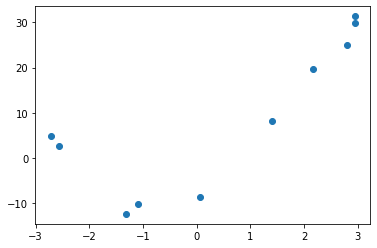

In [24]:
"""
Now let's generate some data.
"""

def gen_data(N):
    """Generates N data points"""
    X = np.random.uniform(-3, 3, size=N)
    Y = 3*X**2 + 4*X - 7 + np.random.normal(size=N)*2
    return np.expand_dims(X, 1), Y
    
X, Y = gen_data(10)
plt.scatter(X[:,0], Y)

In [25]:
# This is how training data looks like (pairs of input and expected output)
list(zip(X, Y))

[(array([2.93952734]), 29.826389391643726),
 (array([-2.7225846]), 4.85410945487299),
 (array([2.16101733]), 19.69461657146333),
 (array([-2.56926267]), 2.5734627633694345),
 (array([1.40498037]), 8.148985276694003),
 (array([2.80266726]), 24.91785837106051),
 (array([0.05342097]), -8.535569911665583),
 (array([2.94631605]), 31.34666781631759),
 (array([-1.1023609]), -10.165694316203195),
 (array([-1.32210344]), -12.34565726094334)]

train_error 93.32184730493263


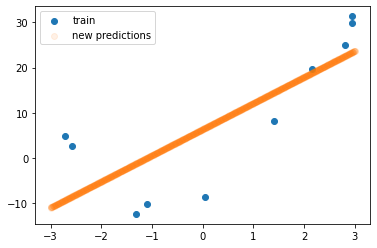

In [30]:
"""Fit the linear model and check the train error, predict for new datapoints"""
clf = LinearRegression()
clf.fit(X, Y)

X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

new_predictions = clf.predict(X_new)

plt.scatter(X, Y, label="train")
plt.scatter(X_new, new_predictions, alpha=0.1, label="new predictions")
plt.legend()

train_error = np.mean((clf.predict(X) - Y)**2)
print("train_error", train_error)

train_error 6.843564239590409


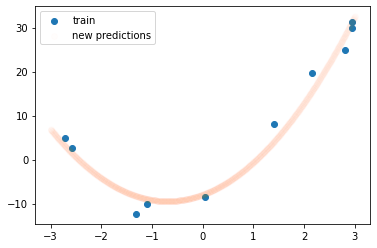

In [32]:
"""Now quadratic model and check the error, predict new"""
quad_features = PolynomialFeatures(2, include_bias=False)

X_quad = quad_features.fit_transform(X)

clf = LinearRegression()
clf.fit(X_quad, Y)

X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

new_predictions = clf.predict(quad_features.transform(X_new))

plt.scatter(X, Y, label="train")
plt.scatter(X_new, new_predictions, alpha=0.01, label="new predictions")
plt.legend()

train_error = np.mean((clf.predict(X_quad) - Y)**2)
print("train_error", train_error)

degree 3


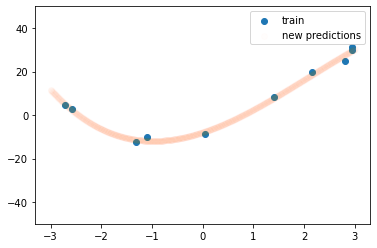

train_error 1.7214022881497069
------------------------
degree 4


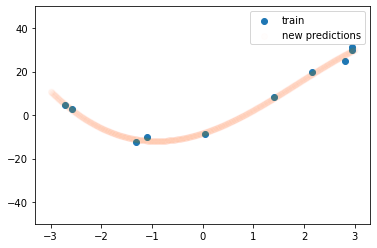

train_error 1.6843490232168872
------------------------
degree 5


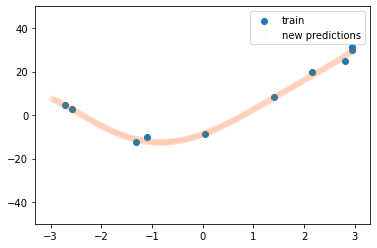

train_error 1.5917365854724286
------------------------
degree 6


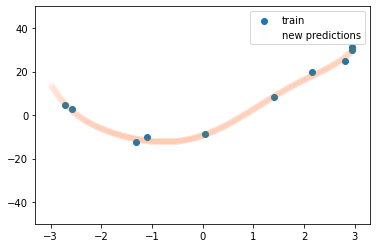

train_error 1.364905633500682
------------------------
degree 7


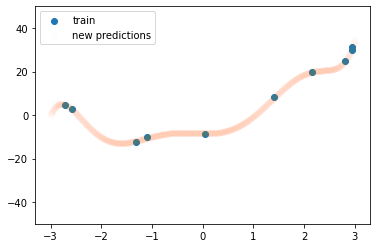

train_error 0.11260193640175072
------------------------
degree 8


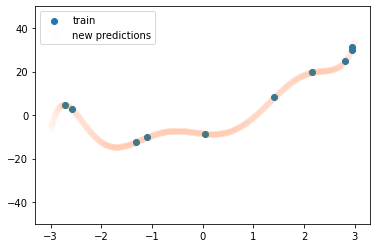

train_error 0.06628613549036726
------------------------
degree 9


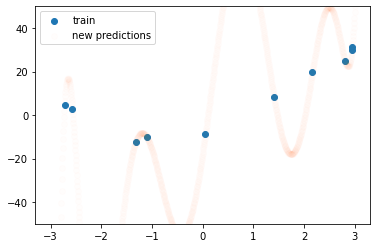

train_error 7.097361891155318e-20
------------------------


In [34]:
"""Now higher degree models"""
for degree in range(3, 10):
    print("degree", degree)
    poly_features = PolynomialFeatures(degree, include_bias=False)

    X_poly = poly_features.fit_transform(X)

    clf = LinearRegression()
    clf.fit(X_poly, Y)

    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

    new_predictions = clf.predict(poly_features.transform(X_new))

    plt.scatter(X, Y, label="train")
    plt.scatter(X_new, new_predictions, alpha=0.01, label="new predictions")
    plt.legend()
    plt.ylim(-50, 50)
    plt.show()

    train_error = np.mean((clf.predict(X_poly) - Y)**2)
    print("train_error", train_error)
    print("------------------------")

In [36]:
_= """
Model with higher degree of polynome have smaller training error.
But they predict nonsense.
This is called overfit, we fitted not only relavent stuff from data, but also noise.
Overfited models are useless for prediction on new data.
"""

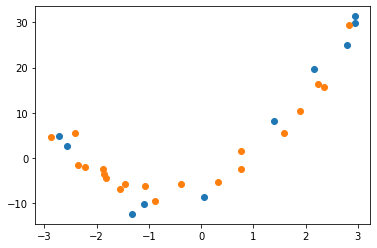

In [37]:
"What we care is about error on new data. Let's have some new data."

X2, Y2 = gen_data(20)
plt.scatter(X, Y)
plt.scatter(X2, Y2)

degree 1


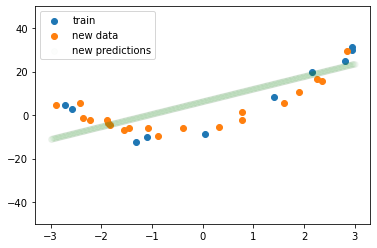

train_error 93.32184730493263 error on new data 70.0537890959283
------------------------
degree 2


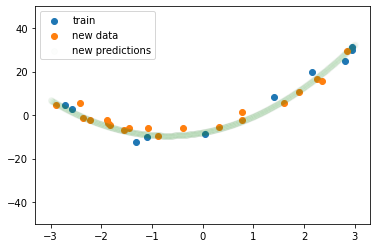

train_error 6.843564239590409 error on new data 5.25859799550262
------------------------
degree 3


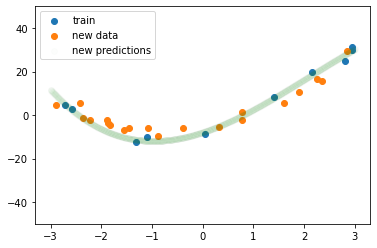

train_error 1.7214022881497069 error on new data 15.481832308625092
------------------------
degree 4


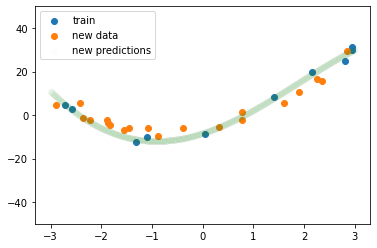

train_error 1.6843490232168872 error on new data 14.890547719684022
------------------------
degree 5


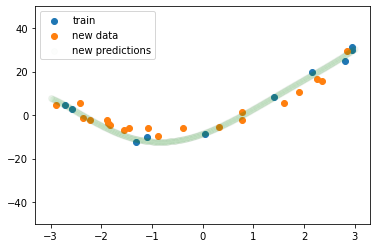

train_error 1.5917365854724286 error on new data 12.786267288401072
------------------------
degree 6


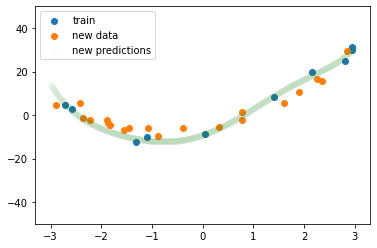

train_error 1.364905633500682 error on new data 15.885604907793214
------------------------
degree 7


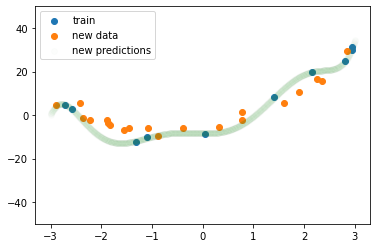

train_error 0.11260193640175072 error on new data 28.19268155146936
------------------------
degree 8


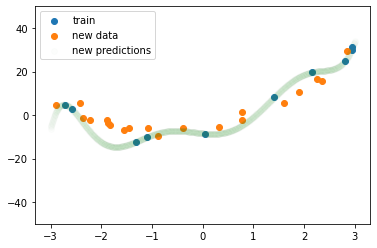

train_error 0.06628613549036726 error on new data 38.00280288493962
------------------------
degree 9


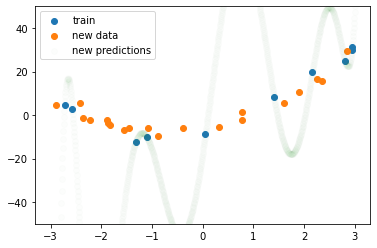

train_error 7.097361891155318e-20 error on new data 5498.721454709407
------------------------


In [42]:
"""Now let's do the same, but also check error on new data."""
train_errors = []
new_data_errors = []

for degree in range(1, 10):
    print("degree", degree)
    poly_features = PolynomialFeatures(degree, include_bias=False)

    X_poly = poly_features.fit_transform(X)

    clf = LinearRegression()
    clf.fit(X_poly, Y)

    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

    new_predictions = clf.predict(poly_features.transform(X_new))

    plt.scatter(X, Y, label="train")
    plt.scatter(X2, Y2, label="new data")
    plt.scatter(X_new, new_predictions, alpha=0.01, label="new predictions")
    plt.legend()
    plt.ylim(-50, 50)
    plt.show()

    train_error = np.mean((clf.predict(X_poly) - Y)**2)
    new_data_error = np.mean((clf.predict(poly_features.transform(X2)) - Y2)**2)
    print("train_error", train_error, "error on new data", new_data_error)
    print("------------------------")
    train_errors.append(train_error)
    new_data_errors.append(new_data_error)

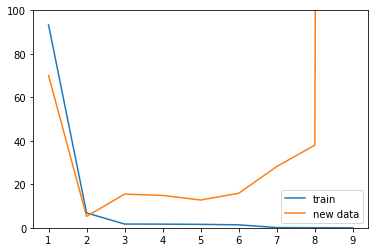

In [44]:
"""Let's plot errors vs degree"""
plt.plot(list(range(1, 10)), train_errors, label="train")
plt.plot(list(range(1, 10)), new_data_errors, label="new data")
plt.ylim(0, 100)
plt.legend()

In [45]:
_ = """
What we really want is that model works on the new data. Thus degree 2 in the best in current example.

In reality: Somebody gives you 10000s of data points.
You should build a model with them, but also pick the best model.
We will split data into 3 groups:
- train - this goes into fit function, X in case above
- valid - used to select best model and hyperparameters (i.e. degree of polynomial)
- test - to report final performance

How sizes affect things:
- Bigger train set - more precise model (model fits less noise)
- Bigger valid/test set - we can trust the error more, more precise evaluation
  - Rigorous error should be: (mean +- inter), bigger test set makes inter smaller
"""

degree 1


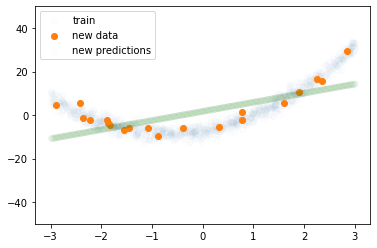

train_error 70.24407741280194 error on new data 52.39782581454945
------------------------
degree 2


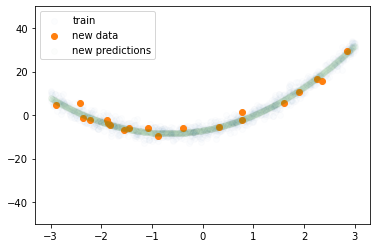

train_error 3.882811915625733 error on new data 3.6542227698695213
------------------------
degree 3


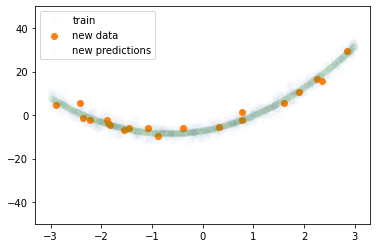

train_error 3.8825838919648494 error on new data 3.665450242902316
------------------------
degree 4


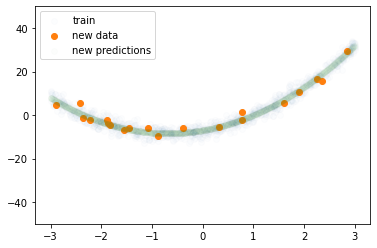

train_error 3.880975731451712 error on new data 3.6487922043687404
------------------------
degree 5


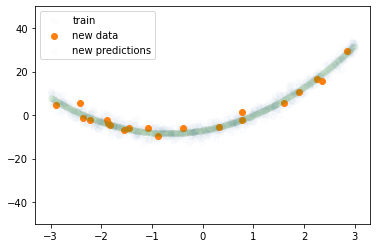

train_error 3.880974977806108 error on new data 3.6474629213171106
------------------------
degree 6


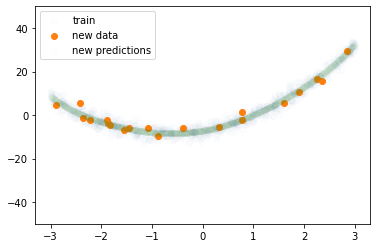

train_error 3.857408619561865 error on new data 3.683264864295881
------------------------
degree 7


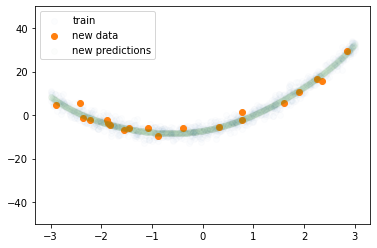

train_error 3.8567774405762147 error on new data 3.6817088567967295
------------------------
degree 8


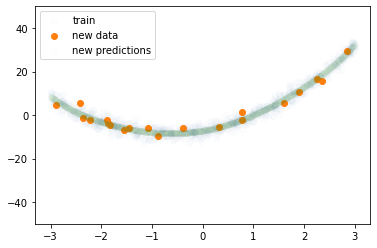

train_error 3.856723923042083 error on new data 3.6852054395179628
------------------------
degree 9


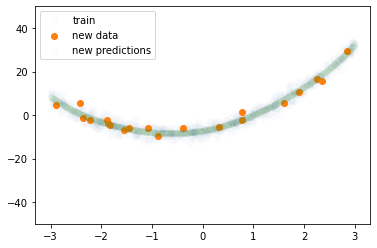

train_error 3.856642001551454 error on new data 3.690233059384584
------------------------


In [46]:
"""Now let's do the same, but also check error on new data and have big train set."""
train_errors = []
new_data_errors = []
Xbig, Ybig = gen_data(1000)

for degree in range(1, 10):
    print("degree", degree)
    poly_features = PolynomialFeatures(degree, include_bias=False)

    X_poly = poly_features.fit_transform(Xbig)

    clf = LinearRegression()
    clf.fit(X_poly, Ybig)

    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

    new_predictions = clf.predict(poly_features.transform(X_new))

    plt.scatter(Xbig, Ybig, label="train", alpha=0.01)
    plt.scatter(X2, Y2, label="new data")
    plt.scatter(X_new, new_predictions, alpha=0.01, label="new predictions")
    plt.legend()
    plt.ylim(-50, 50)
    plt.show()

    train_error = np.mean((clf.predict(X_poly) - Ybig)**2)
    new_data_error = np.mean((clf.predict(poly_features.transform(X2)) - Y2)**2)
    print("train_error", train_error, "error on new data", new_data_error)
    print("------------------------")
    train_errors.append(train_error)
    new_data_errors.append(new_data_error)

degree 1


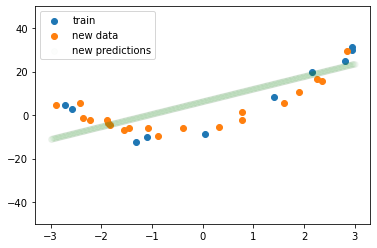

train_error on full data 93.32184730493263 error on new data 70.0537890959283 cross val error 157.38113688988773
------------------------
degree 2


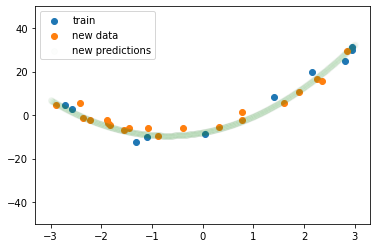

train_error on full data 6.843564239590409 error on new data 5.25859799550262 cross val error 13.292381178570272
------------------------
degree 3


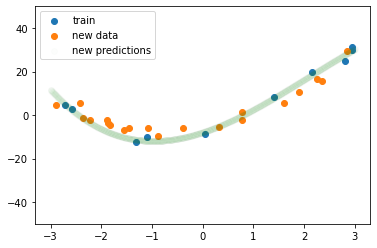

train_error on full data 1.7214022881497069 error on new data 15.481832308625092 cross val error 3.8811276598668982
------------------------
degree 4


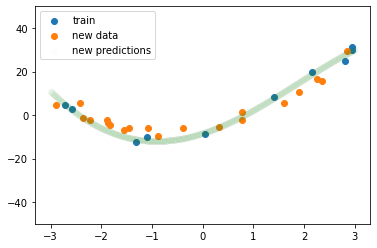

train_error on full data 1.6843490232168872 error on new data 14.890547719684022 cross val error 4.0458972676571126
------------------------
degree 5


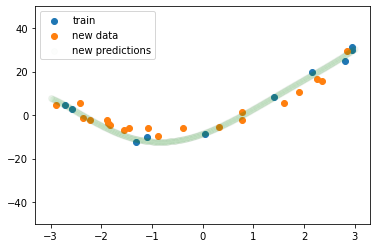

train_error on full data 1.5917365854724286 error on new data 12.786267288401072 cross val error 7.878429161074561
------------------------
degree 6


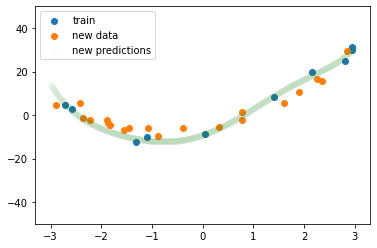

train_error on full data 1.364905633500682 error on new data 15.885604907793214 cross val error 394.18675952094543
------------------------
degree 7


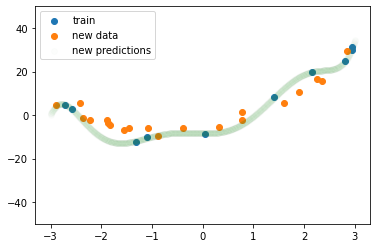

train_error on full data 0.11260193640175072 error on new data 28.19268155146936 cross val error 3558509.9966835445
------------------------
degree 8


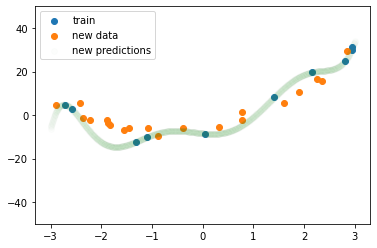

train_error on full data 0.06628613549036726 error on new data 38.00280288493962 cross val error 75568.5622298659
------------------------
degree 9


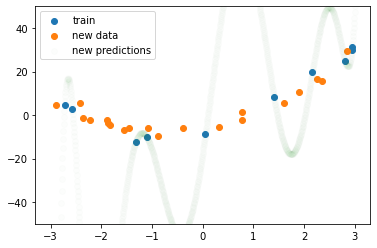

train_error on full data 7.097361891155318e-20 error on new data 5498.721454709407 cross val error 26225.34344675164
------------------------


In [50]:
"""
One more problem.
What if we have very small dataset, e.g. 100 points.
After split we get:
 - train 80 samples
 - valid 10 samples
 - test 10 samples
 
This is bad.

This can be saved by crossvalidation, do train/test and instead of valid do crossvalidation as in 
https://scikit-learn.org/stable/modules/cross_validation.html
Split data into K parts. Train K-times always evaluate on different part.
"""

"""Now let's do the same, but also check error on new data, and also cross val score"""
from sklearn.model_selection import cross_val_score

train_errors = []
new_data_errors = []

for degree in range(1, 10):
    print("degree", degree)
    poly_features = PolynomialFeatures(degree, include_bias=False)

    X_poly = poly_features.fit_transform(X)

    clf = LinearRegression()
    #clf.fit(X_poly, Y)
    score = cross_val_score(clf, X_poly, Y, cv=5, scoring="neg_mean_squared_error")

    clf.fit(X_poly, Y)
    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

    new_predictions = clf.predict(poly_features.transform(X_new))

    plt.scatter(X, Y, label="train")
    plt.scatter(X2, Y2, label="new data")
    plt.scatter(X_new, new_predictions, alpha=0.01, label="new predictions")
    plt.legend()
    plt.ylim(-50, 50)
    plt.show()

    train_error = np.mean((clf.predict(X_poly) - Y)**2)
    new_data_error = np.mean((clf.predict(poly_features.transform(X2)) - Y2)**2)
    print("train_error on full data", train_error, "error on new data", new_data_error, "cross val error", -np.mean(score))
    print("------------------------")
    train_errors.append(train_error)
    new_data_errors.append(new_data_error)

degree 1


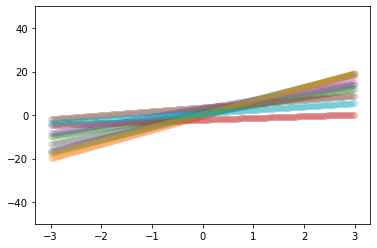

degree 2


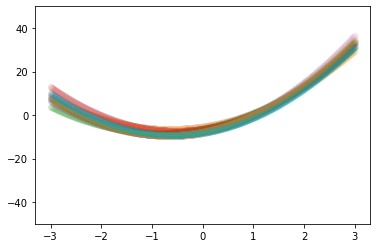

degree 4


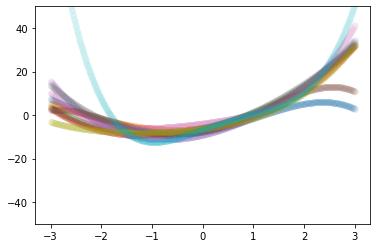

degree 9


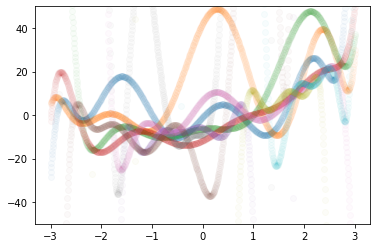

In [54]:
"""
Test error can be decompsoded into bias and variance:
Bias - what model cannot predict (e.g. linear model on quadratic data)
Variance - if I repeat training on new data, how different model I will get

Small degree - high bias, low variance
High degree - low bias, high variance
"""

"""Lets train 10 models on different data"""

for degree in [1, 2, 4, 9]:
    print("degree", degree)
    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)
    for _ in range(10):
        X, Y = gen_data(10)
        poly_features = PolynomialFeatures(degree, include_bias=False)

        X_poly = poly_features.fit_transform(X)

        clf = LinearRegression()
        clf.fit(X_poly, Y)

        new_predictions = clf.predict(poly_features.transform(X_new))

        #plt.scatter(X, Y, label="train")
        plt.scatter(X_new, new_predictions, alpha=0.03)
        
    plt.ylim(-50, 50)
    plt.show()